# This file has all the cool plotting code.

In [296]:
import os
import pandas as pd
import re
from rich.console import Console
from rich.table import Table
import math
import seaborn as sns
import matplotlib.pyplot as plt
console = Console()

In [297]:
def get_summarized_data(dfs):
    data = pd.DataFrame(columns=["Size", "Type", "Time", "Comparisons"])

    for size in dfs:
        for manip_type in dfs[size]:
            
            tempdf = pd.DataFrame({"Size": size, "Type": manip_type, "Time": dfs[size][manip_type]["time"].mean(), "Comparisons": dfs[size][manip_type]["comparison_count"].mean()}, index=[0])

            data = pd.concat([data, tempdf], ignore_index=True)

    return data

In [298]:
def pretty_print_data(dfs, size):

    table = Table(title=f"Size {size} | n log n: {round(size * math.log(size, 2), 4)} | 1.5 n log n: {round(size * 1.5 * math.log(size, 2), 4)}")
    table.add_column("")
    table.add_column("Sorted")
    table.add_column("Reverse")
    table.add_column("Random Shuffle")
    table.add_row("Comparisons", str(dfs[size]['sorted']["comparison_count"].mean()), str(dfs[size]['reverse']["comparison_count"].mean()), str(dfs[size]['shuffle']["comparison_count"].mean()))
    table.add_row("Time", str(dfs[size]['sorted']["time"].mean()), str(dfs[size]['reverse']["time"].mean()), str(dfs[size]['shuffle']["time"].mean()))

    console.print(table)

In [324]:
outfile_loc = "output"

heapdfs = {}
quickdfs = {}

for _, _, files in os.walk(outfile_loc):
    for file in files:

        size = int(re.findall(r'size(\d+)', file)[0])
        manip_type = re.findall(r'\d_(\w+).txt', file)[0]

        if "_heap_" in file:
            if size not in heapdfs:
                heapdfs[size] = {}
                heapdfs[size][manip_type] = pd.read_csv(outfile_loc + "/" + file)
            else:
                heapdfs[size][manip_type] = pd.read_csv(outfile_loc + "/" + file)

        elif "_quick_" in file:
            
            if size not in quickdfs:
                quickdfs[size] = {}
                quickdfs[size][manip_type] = pd.read_csv(outfile_loc + "/" + file)
            else:
                quickdfs[size][manip_type] = pd.read_csv(outfile_loc + "/" + file)
                

In [345]:
heap_data = get_summarized_data(heapdfs)
quick_data = get_summarized_data(quickdfs)

heap_data["Algorithm"] = "heap"
quick_data["Algorithm"] = "quick"

data = pd.concat([heap_data, quick_data])

data["Time"] = data["Time"].apply(lambda x: round(x/1e6, 2))

/var/folders/65/1rmmptvx50q4_7z2lwbwbhsc0000gn/T/ipykernel_51115/4185973619.py:9: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/var/folders/65/1rmmptvx50q4_7z2lwbwbhsc0000gn/T/ipykernel_51115/4185973619.py:9: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



/var/folders/65/1rmmptvx50q4_7z2lwbwbhsc0000gn/T/ipykernel_51115/3743933444.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



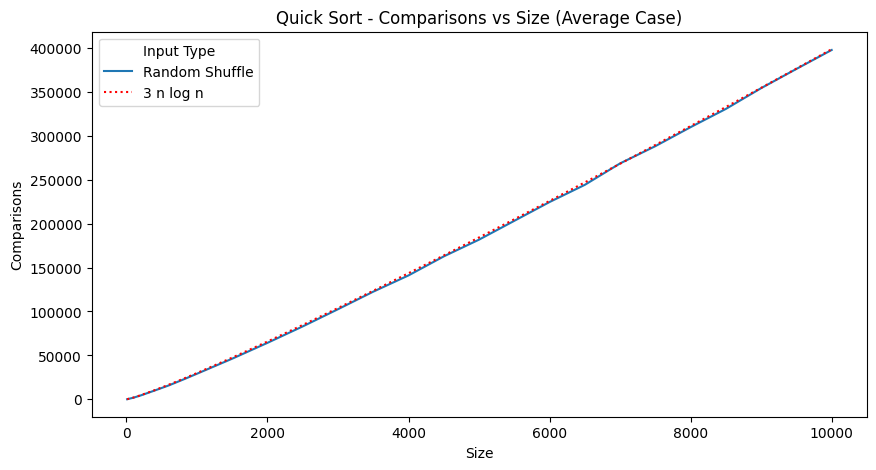

In [346]:
plt.figure(figsize=(10, 5))
plt.title("Quick Sort - Comparisons vs Size (Average Case)")
dqs = data[(data["Algorithm"] == "quick") & (data["Type"] == "shuffle")]

dqs["Type"] = dqs["Type"].replace("shuffle", "Random Shuffle")

sns.lineplot(data=dqs, x="Size", y="Comparisons", hue="Type")
# line plot n log n
# plt.plot(sorted(dqs["Size"].unique()), sorted((dqs["Size"] * dqs["Size"].apply(lambda x: math.log(x, 2))).unique()), label="n log n", color="black")

plt.plot(sorted(dqs["Size"].unique()), sorted((dqs["Size"] * dqs["Size"].apply(lambda x: math.log(x, 2)) * 3).unique()), label="3 n log n", color="red", linestyle=":")
# line plot n^2
# plt.plot(sorted(data[data["Algorithm"] == "quick"]["Size "].unique()), sorted((data[data["Algorithm"] == "quick"]["Size"] * data[data["Algorithm"] == "quick"]["Size"]).unique()), label="n^2", color="red")
plt.legend(title="Input Type")
plt.show()

/var/folders/65/1rmmptvx50q4_7z2lwbwbhsc0000gn/T/ipykernel_51115/484315191.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



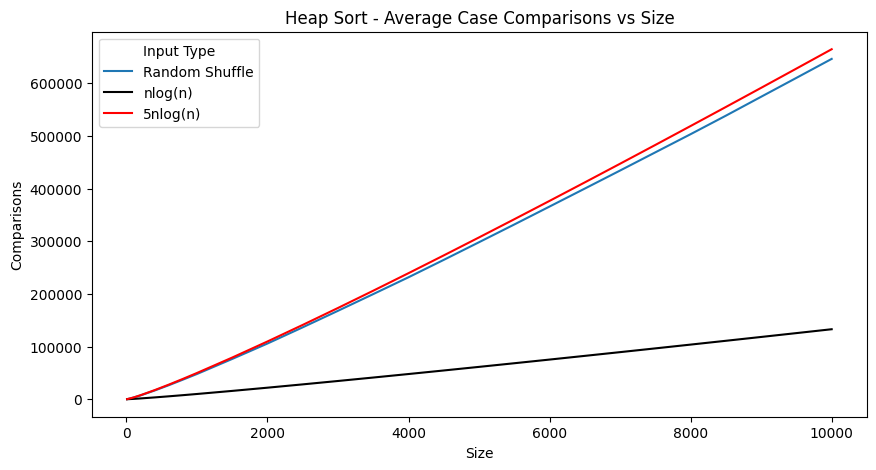

In [347]:
plt.figure(figsize=(10, 5))
plt.title("Heap Sort - Average Case Comparisons vs Size")

dqs = data[(data["Algorithm"] == "heap") & (data["Type"] == "shuffle")]

dqs["Type"] = dqs["Type"].replace("shuffle", "Random Shuffle")

# dqs["Type"].replace({"shuffle": "Random Shuffle"}, inplace=True)

sns.lineplot(data=dqs, x="Size", y="Comparisons", hue="Type", )
# line plot n log n
plt.plot(sorted(dqs["Size"].unique()), sorted((dqs["Size"] * dqs["Size"].apply(lambda x: math.log(x, 2))).unique()), label="nlog(n)", color="black")

plt.plot(sorted(dqs["Size"].unique()), sorted((dqs["Size"] * dqs["Size"].apply(lambda x: math.log(x, 2)) * 5).unique()), label="5nlog(n)", color="red")
# line plot n^2
# plt.plot(sorted(data[data["Algorithm"] == "quick"]["Size "].unique()), sorted((data[data["Algorithm"] == "quick"]["Size"] * data[data["Algorithm"] == "quick"]["Size"]).unique()), label="n^2", color="red")
plt.legend(title="Input Type")
plt.show()

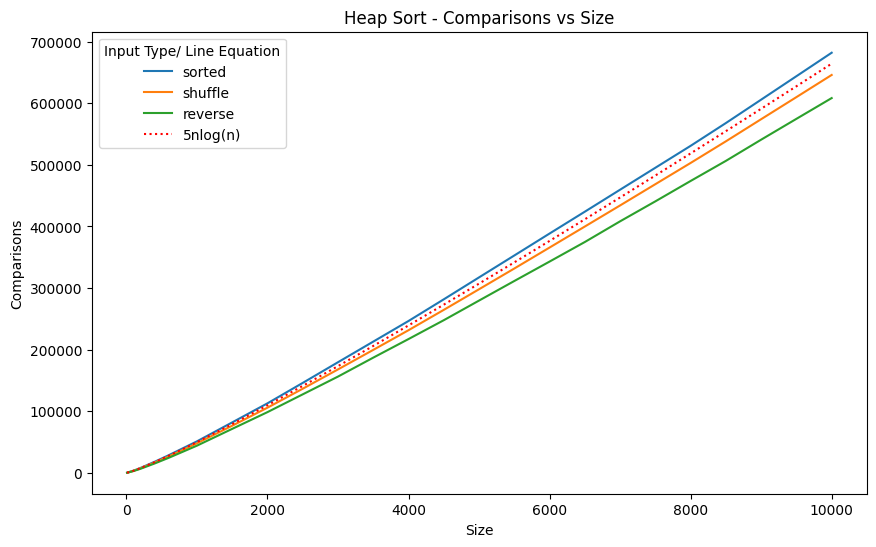

In [359]:
plt.figure(figsize=(10, 6))
plt.title("Heap Sort - Comparisons vs Size")
sns.lineplot(data=data[data["Algorithm"] == "heap"], x="Size", y="Comparisons", hue="Type")
plt.plot(sorted(dqs["Size"].unique()), sorted((dqs["Size"] * dqs["Size"].apply(lambda x: math.log(x, 2)) * 5).unique()), label="5nlog(n)", color="red", linestyle=":")
plt.legend(title="Input Type/ Line Equation")
plt.show()

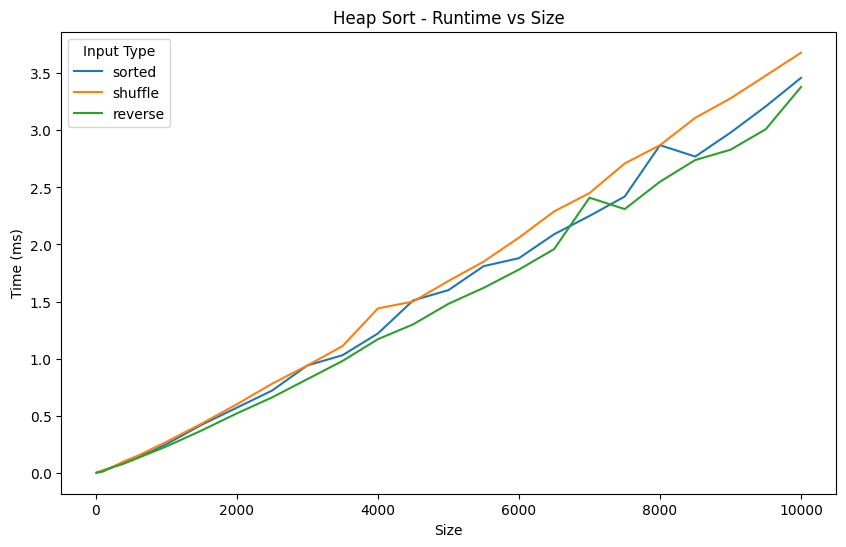

In [365]:
plt.figure(figsize=(10, 6))
plt.title("Heap Sort - Runtime vs Size")
sns.lineplot(data=data[data["Algorithm"] == "heap"], x="Size", y="Time", hue="Type")
plt.ylabel("Time (ms)")
# plt.plot(sorted(dqs["Size"].unique()), sorted((dqs["Size"] * dqs["Size"].apply(lambda x: math.log(x, 2)) * 5).unique()), label="5nlog(n)", color="red")
plt.legend(title="Input Type")
plt.show()

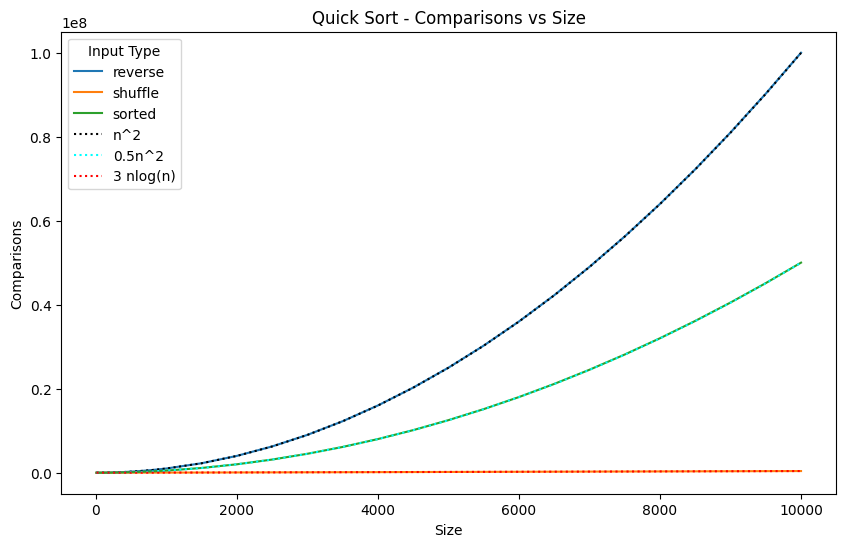

In [378]:
plt.figure(figsize=(10, 6))
plt.title("Quick Sort - Comparisons vs Size")
sns.lineplot(data=data[data["Algorithm"] == "quick"], x="Size", y="Comparisons", hue="Type")
plt.plot(sorted(dqs["Size"].unique()), sorted((dqs["Size"] * dqs["Size"]).unique()), label="n^2", color="black", linestyle=":")
plt.plot(sorted(dqs["Size"].unique()), sorted((dqs["Size"] * dqs["Size"] * 0.5).unique()), label="0.5n^2", color="cyan", linestyle=":")
plt.plot(sorted(dqs["Size"].unique()), sorted((dqs["Size"] * dqs["Size"].apply(lambda x: math.log(x, 2)) * 3).unique()), label="3 nlog(n)", color="red", linestyle=":")
plt.legend(title="Input Type")
plt.show()

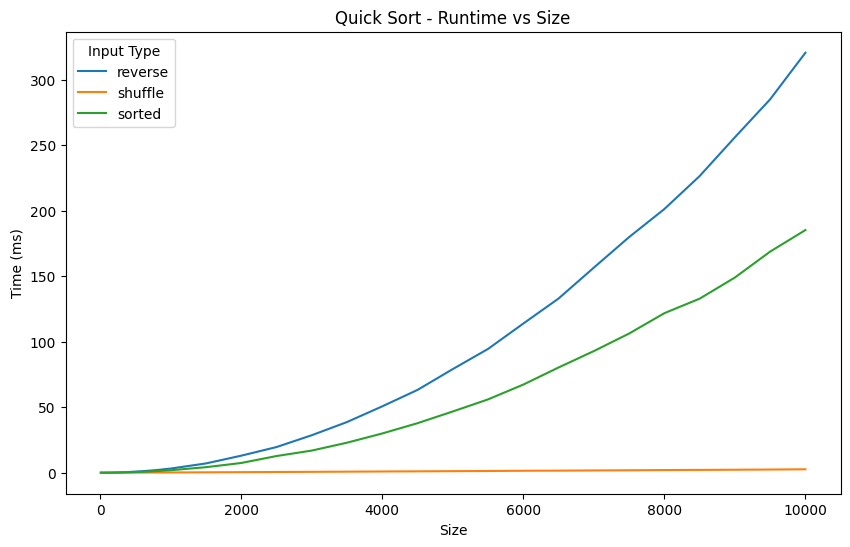

In [364]:
plt.figure(figsize=(10, 6))
plt.title("Quick Sort - Runtime vs Size")
sns.lineplot(data=data[data["Algorithm"] == "quick"], x="Size", y="Time", hue="Type")
plt.legend(title="Input Type")
plt.ylabel("Time (ms)")
plt.show()

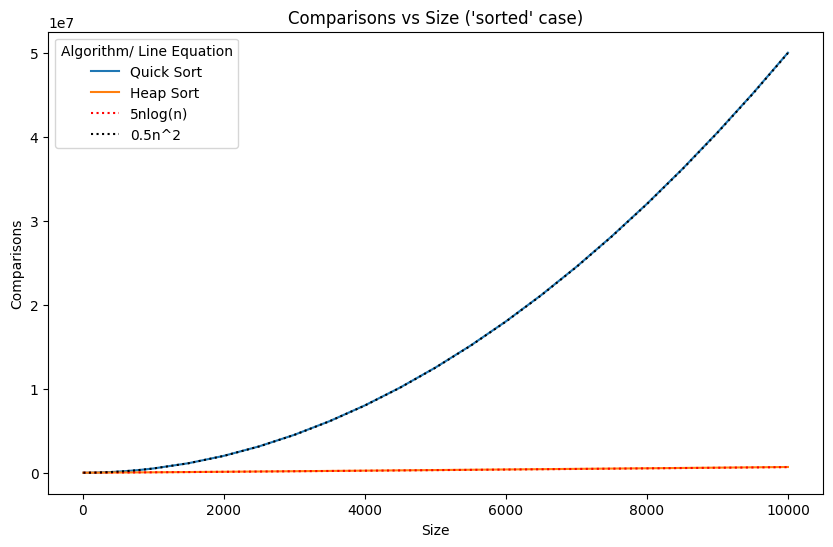

In [392]:
plt.figure(figsize=(10, 6))
plt.title("Comparisons vs Size ('sorted' case)")
dqs = data[(data["Algorithm"] == "quick") & (data["Type"] == "sorted")]
dhs = data[(data["Algorithm"] == "heap") & (data["Type"] == "sorted")]

sns.lineplot(data=dqs, x="Size", y="Comparisons", label="Quick Sort")
sns.lineplot(data=dhs, x="Size", y="Comparisons", label="Heap Sort")

# line plot n log n
# plt.plot(sorted(dqs["Size"].unique()), sorted((dqs["Size"] * dqs["Size"].apply(lambda x: math.log(x, 2))).unique()), label="n log n", color="black")

plt.plot(sorted(dqs["Size"].unique()), sorted((dqs["Size"] * dqs["Size"].apply(lambda x: math.log(x, 2)) * 5).unique()), label="5nlog(n)", color="red", linestyle=":")
# line plot n^2
plt.plot(sorted(dqs["Size"].unique()), sorted((dqs["Size"] * dqs["Size"] * 0.5).unique()), label="0.5n^2", color="black", linestyle=":")
plt.legend(title="Algorithm/ Line Equation")
plt.show()

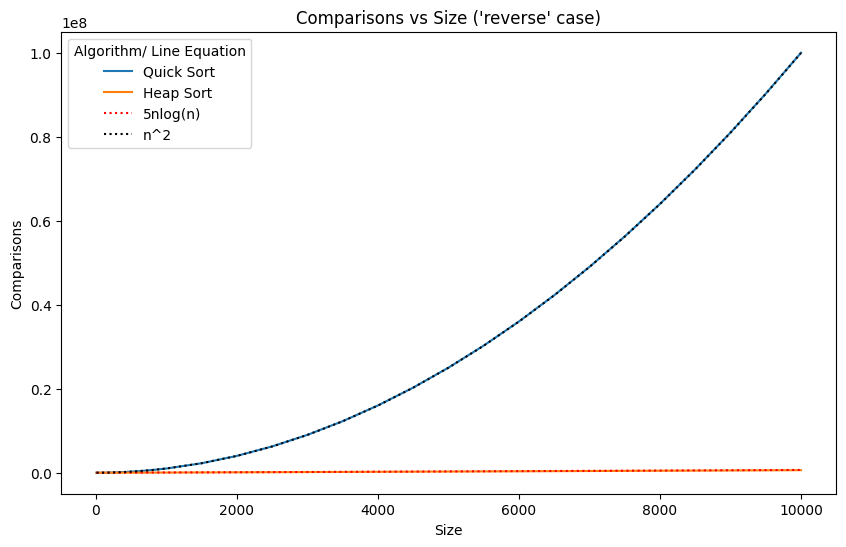

In [388]:
plt.figure(figsize=(10, 6))
plt.title("Comparisons vs Size ('reverse' case)")
dqs = data[(data["Algorithm"] == "quick") & (data["Type"] == "reverse")]
dhs = data[(data["Algorithm"] == "heap") & (data["Type"] == "reverse")]

sns.lineplot(data=dqs, x="Size", y="Comparisons", label="Quick Sort")
sns.lineplot(data=dhs, x="Size", y="Comparisons", label="Heap Sort")

# line plot n log n
# plt.plot(sorted(dqs["Size"].unique()), sorted((dqs["Size"] * dqs["Size"].apply(lambda x: math.log(x, 2))).unique()), label="n log n", color="black")

plt.plot(sorted(dqs["Size"].unique()), sorted((dqs["Size"] * dqs["Size"].apply(lambda x: math.log(x, 2)) * 5).unique()), label="5nlog(n)", color="red", linestyle=":")
# line plot n^2
plt.plot(sorted(dqs["Size"].unique()), sorted((dqs["Size"] * dqs["Size"]).unique()), label="n^2", color="black", linestyle=":")
plt.legend(title="Algorithm/ Line Equation")
plt.show()

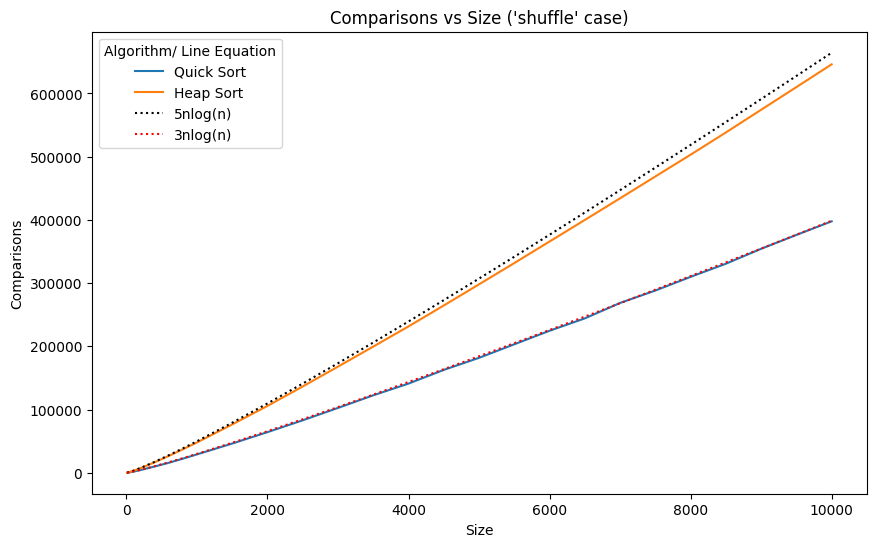

In [391]:
plt.figure(figsize=(10, 6))
plt.title("Comparisons vs Size ('shuffle' case)")
dqs = data[(data["Algorithm"] == "quick") & (data["Type"] == "shuffle")]
dhs = data[(data["Algorithm"] == "heap") & (data["Type"] == "shuffle")]

sns.lineplot(data=dqs, x="Size", y="Comparisons", label="Quick Sort")
sns.lineplot(data=dhs, x="Size", y="Comparisons", label="Heap Sort")

# line plot n log n
# plt.plot(sorted(dqs["Size"].unique()), sorted((dqs["Size"] * dqs["Size"].apply(lambda x: math.log(x, 2))).unique()), label="n log n", color="black")

plt.plot(sorted(dqs["Size"].unique()), sorted((dqs["Size"] * dqs["Size"].apply(lambda x: math.log(x, 2)) * 5).unique()), label="5nlog(n)", color="black", linestyle=":")
plt.plot(sorted(dqs["Size"].unique()), sorted((dqs["Size"] * dqs["Size"].apply(lambda x: math.log(x, 2)) * 3).unique()), label="3nlog(n)", color="red", linestyle=":")
# line plot n^2
# plt.plot(sorted(dqs["Size"].unique()), sorted((dqs["Size"] * dqs["Size"]).uniquse()), label="n^2", color="black", linestyle=":")
plt.legend(title="Algorithm/ Line Equation")
plt.show()